# Initialize Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ROOT
import uproot
import os
import sys
import tqdm
import pandas as pd
import pickle as pkl

%jsroot on
# %matplotlib qt
%matplotlib inline

Welcome to JupyROOT 6.30/02


In [2]:
sys.path.append('../python/')
from filterMethods import *
from hitAccuracyMethods import *
from statisticsMethods import *
from importMethods import *
from constants import *
import plotParameters

In [6]:
print('+y', np.dot(get_rotationMatrix([0,0,1], [0,-1,0]), [1,1,1]))
print('-x', np.dot(get_rotationMatrix([0,0,1], [1,0,0]), [1,1,1]))
print('-z', np.dot(get_rotationMatrix([0,0,1], [0,0,1]), [1,1,1]))
print('+x', np.dot(get_rotationMatrix([0,0,1], [-1,0,0]), [1,1,1]))
print('+z', np.dot(get_rotationMatrix([0,0,1], [0,0,-1]), [1,1,1]))
print('-y', np.dot(get_rotationMatrix([0,0,1], [0,1,0]), [1,1,1]))

+y [ 1. -1.  1.]
-x [ 1.  1. -1.]
-z [1. 1. 1.]
+x [-1.  1.  1.]
+z [-1. -1. -1.]
-y [ 1.  1. -1.]


In [3]:
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

# Load Data

In [4]:
# fileName = '../runs/event_2mu100MeVBackToBack_usedForTrackReconstruction.root'
# fileName = '../runs/calibration_2.42^3_10000gamma_1000events.root'
# fileName = '../runs/calibration_2.42^3_1000gamma_1000events_0cmFOVL.root'
# fileName = '../runs/calibration_2.42^3_10000gamma_1000events_20cmFOVL.root'
fileName = '../build/calibration.root'
# fileName = '../build/event100.root'

histDir = '/photoSensor_hits_histograms'

print(get_histogram_names    (fileName, histDir))
print(get_histogram_titles   (fileName, histDir))
print(get_histogram_positions(fileName, histDir))
print(get_histogram_walls    (fileName, histDir))

['photoSensor_0;1', 'photoSensor_1;1', 'photoSensor_2;1', 'photoSensor_3;1', 'photoSensor_4;1', 'photoSensor_5;1', 'photoSensor_6;1', 'photoSensor_7;1', 'photoSensor_8;1', 'photoSensor_9;1', 'photoSensor_10;1', 'photoSensor_11;1', 'photoSensor_12;1', 'photoSensor_13;1', 'photoSensor_14;1', 'photoSensor_15;1', 'photoSensor_16;1', 'photoSensor_17;1', 'photoSensor_18;1', 'photoSensor_19;1', 'photoSensor_20;1', 'photoSensor_21;1', 'photoSensor_22;1', 'photoSensor_23;1', 'photoSensor_24;1', 'photoSensor_25;1', 'photoSensor_26;1', 'photoSensor_27;1', 'photoSensor_28;1', 'photoSensor_29;1', 'photoSensor_30;1', 'photoSensor_31;1', 'photoSensor_32;1', 'photoSensor_33;1', 'photoSensor_34;1', 'photoSensor_35;1', 'photoSensor_36;1', 'photoSensor_37;1', 'photoSensor_38;1', 'photoSensor_39;1', 'photoSensor_40;1', 'photoSensor_41;1', 'photoSensor_42;1', 'photoSensor_43;1', 'photoSensor_44;1', 'photoSensor_45;1', 'photoSensor_46;1', 'photoSensor_47;1', 'photoSensor_48;1', 'photoSensor_49;1', 'photoSen

In [5]:
treeName_photoSensor = 'photoSensor_hits;1'
treeName_lens        = 'lens_hits;1'
df_hits = pd.DataFrame(columns=['sensor_name', 'sensor_direction', 'sensor_position', 'relativePosition', 'relativePosition_binned', 'time'])
df_hits['sensor_name'                        ] = get_photosensor_hits_photosensor_ID              (fileName, treeName_photoSensor)
df_hits['sensor_direction'                   ] = get_photosensor_hits_photosensor_direction       (fileName, treeName_photoSensor)
df_hits['sensor_position'                    ] = get_photosensor_hits_photosensor_position        (fileName, treeName_photoSensor)
df_hits['sensor_wall'                        ] = get_photosensor_hits_photosensor_wall            (fileName, treeName_photoSensor)
df_hits['relativePosition'                   ] = get_photosensor_hits_position_relative           (fileName, treeName_photoSensor)
df_hits['relativePosition'                   ] = fixRotations(np.array(df_hits['relativePosition'].to_list()), 
                                                              np.array(df_hits['sensor_wall'].to_list()))
df_hits['relativePosition_binned'            ] = get_photosensor_hits_position_relative_binned    (fileName, treeName_photoSensor, histDir,
                                                                                                   x=np.array(df_hits['relativePosition'].to_list())[:,0],
                                                                                                   y=np.array(df_hits['relativePosition'].to_list())[:,1])
df_hits['relativePosition_nBin'              ] = get_photosensor_hits_position_relative_nBin      (fileName, treeName_photoSensor, histDir)
df_hits['absolutePosition'                   ] = get_photosensor_hits_position_absolute           (fileName, treeName_photoSensor)
df_hits['initialPosition'                    ] = get_photosensor_hits_position_initial            (fileName, treeName_photoSensor)
df_hits['time'                               ] = get_photosensor_hits_time                        (fileName, treeName_photoSensor)


df_hits['direction_relative'                 ] = get_photosensor_hits_direction_relative     (fileName, treeName_photoSensor)
df_hits['direction_relative_lens_0'          ] = get_photosensor_hits_direction_relative_lens(fileName, treeName_photoSensor, 0)
df_hits['position_relative_lens_0'           ] = get_photosensor_hits_position_relative_lens (fileName, treeName_photoSensor, 0)
df_hits['direction_relative_lens_1'          ] = get_photosensor_hits_direction_relative_lens(fileName, treeName_photoSensor, 1)
df_hits['position_relative_lens_1'           ] = get_photosensor_hits_position_relative_lens (fileName, treeName_photoSensor, 1)

df_hits['direction_relative'                 ] = fixRotations(np.array(df_hits['direction_relative'].to_list()), np.array(df_hits['sensor_wall'].to_list()))
df_hits['direction_relative_lens_0'          ] = fixRotations(np.array(df_hits['direction_relative_lens_0'].to_list()), np.array(df_hits['sensor_wall'].to_list()))
df_hits['position_relative_lens_0'           ] = fixRotations(np.array(df_hits['position_relative_lens_0'].to_list()), np.array(df_hits['sensor_wall'].to_list()))
df_hits['direction_relative_lens_1'          ] = fixRotations(np.array(df_hits['direction_relative_lens_1'].to_list()), np.array(df_hits['sensor_wall'].to_list()))
df_hits['position_relative_lens_1'           ] = fixRotations(np.array(df_hits['position_relative_lens_1'].to_list()), np.array(df_hits['sensor_wall'].to_list()))

df_hits = df_hits[df_hits['direction_relative_lens_0'] != (0, 0, 0)]
df_hits = df_hits[df_hits['direction_relative_lens_1'] != (0, 0, 0)]
df_hits = df_hits[df_hits['position_relative_lens_0' ] != (0, 0, 0)]
df_hits = df_hits[df_hits['position_relative_lens_1' ] != (0, 0, 0)]

df_hits['direction_relative_lens_0_theta'    ] = df_hits['direction_relative_lens_0'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
df_hits['direction_relative_lens_0_phi'      ] = df_hits['direction_relative_lens_0'].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_lens_0_phi'       ] = df_hits['position_relative_lens_0' ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['direction_relative_lens_1_theta'    ] = df_hits['direction_relative_lens_1'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
df_hits['direction_relative_lens_1_phi'      ] = df_hits['direction_relative_lens_1'].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_lens_1_phi'       ] = df_hits['position_relative_lens_1' ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['direction_relative_phi'             ] = df_hits['direction_relative'       ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_phi'              ] = df_hits['relativePosition'         ].apply(lambda x: np.arctan2(x[1], x[0]))

def boundAngle(angle):
    angle[angle > np.pi] -= 2*np.pi
    angle[angle < -np.pi] += 2*np.pi

    return angle

df_hits['theta_error'] = df_hits['direction_relative_lens_0_theta'] - df_hits['direction_relative_lens_1_theta']
df_hits['phi_error'  ] = df_hits['direction_relative_lens_0_phi'  ] - df_hits['direction_relative_lens_1_phi'  ]
df_hits['phi_error'  ] = boundAngle(df_hits['phi_error']).to_list()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_43754/1222222172.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angle[angle > np.pi] -= 2*np.pi
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_43754/1222222172.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angle[angle < -np.pi] += 2*np.pi


# Filter Hits

In [6]:
search_radius = 0
search_number = 0

df_hits = filter_hits(df_hits, radius=search_radius, number=search_number)

# Reconstruct Hit Angle

In [7]:
# a0 = np.array(df_hits['absolutePosition'].to_list())[:, 0]
# a1 = np.array(df_hits['absolutePosition'].to_list())[:, 1]
# s0 = np.array(df_hits['sensor_position' ].to_list())[:, 0]
# s1 = np.array(df_hits['sensor_position' ].to_list())[:, 1]
# r0 = a0 - s0
# r1 = a1 - s1
r0 = None
r1 = None

binned = True

def rToTheta(r):
    return r/(CM_PER_RAD*MM_PER_CM)
df_hits = make_r(df_hits, x=r0, y=r1)
df_hits = make_theta(df_hits, rToTheta, binned=binned)
df_hits = make_phi(df_hits, binned=binned, x=r0, y=r1)

df_hits = filter_r(df_hits, Y_LIM)

df_hits = make_relativeVector(df_hits)

# Data Visualization

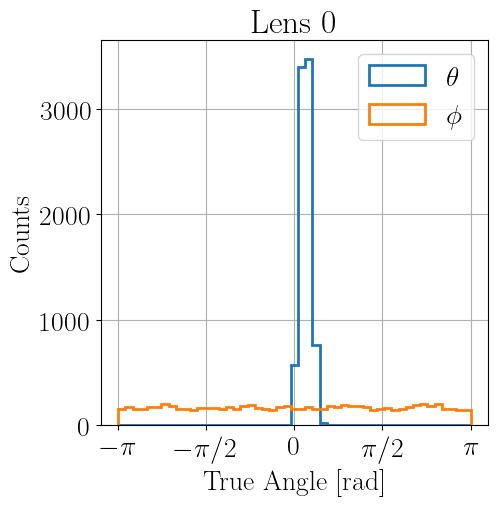

In [8]:
nBins = 50
lw = 2

bins = np.linspace(-np.pi, np.pi, nBins)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(df_hits['direction_relative_lens_0_theta'], bins=bins, histtype='step', label=r'$\theta$', lw=lw)
ax.hist(df_hits['direction_relative_lens_0_phi'  ], bins=bins, histtype='step', label=r'$\phi$'  , lw=lw)
ax.legend()
ax.set_xlabel('True Angle [rad]')
ax.set_ylabel('Counts')
# ax.set_xlim(-np.pi, np.pi)
ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.set_title('Lens 0')
ax.grid()
plt.show()

# Reconstruction Performance

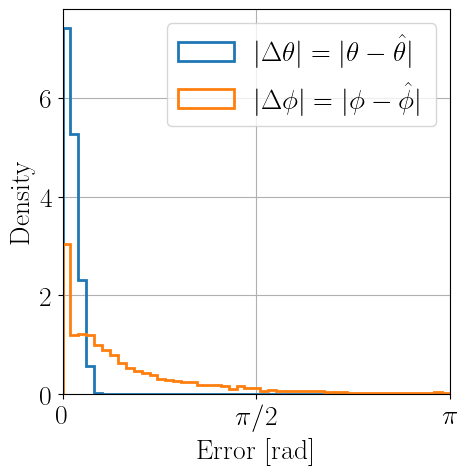

In [9]:
nBins = 50
lw = 2

density = True
cumulative = False
abs = True

error_theta = df_hits['direction_relative_lens_0_theta'] - df_hits['theta'                 ]
error_phi   = df_hits['direction_relative_lens_0_phi'  ] - df_hits['position_relative_phi' ]

if abs:
    error_theta = np.abs(error_theta)
    error_phi   = np.abs(error_phi  )

if abs:
    bins = np.linspace(0, np.pi, nBins)
else:
    bins = np.linspace(-np.pi, np.pi, nBins)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(error_theta, bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\theta}=\abs{\theta-\hat{\theta}}$' if abs else r'$\Delta\theta=\theta-\hat{\theta}$',
        density=density, cumulative=cumulative)
ax.hist(error_phi  , bins=bins, histtype='step', lw=lw, 
        label=r'$\abs{\Delta\phi}=\abs{\phi-\hat{\phi}}$' if abs else r'$\Delta\phi=\phi-\hat{\phi}$',
        density=density, cumulative=cumulative)
ax.legend()
ax.set_xlabel('Error [rad]')
ax.set_ylabel('Density' if density else 'Counts')
# ax.set_yscale('log')
# ax.set_xlim(-np.pi, np.pi)
if abs:
    ax.set_xticks(np.linspace(0, np.pi, 3))
    ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
    ax.set_xlim(0, np.pi)
else:
    ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    ax.set_xlim(-np.pi, np.pi)

ax.grid()

plt.savefig('../figures/theta_phi_error.pdf', bbox_inches='tight')
plt.show()

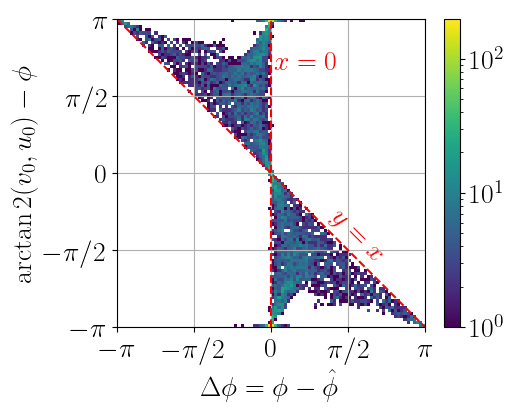

In [10]:
error_phi  = df_hits['direction_relative_lens_0_phi'] - df_hits['phi']
posDir_phi = df_hits['position_relative_lens_0_phi' ] - df_hits['direction_relative_lens_0_phi']

error_phi  = boundAngle(error_phi)
posDir_phi = boundAngle(posDir_phi)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# ax.scatter(error_phi, posDir_phi, s=3)
hist = ax.hist2d(error_phi, posDir_phi, bins=100, norm=LogNorm())
ax.plot([-np.pi, np.pi], [np.pi, -np.pi], ls='--', c='r')
ax.plot([0,0], [-np.pi, np.pi], ls='--', c='r')
ax.set_xlabel(r'$\Delta\phi=\phi-\hat{\phi}$')
ax.set_ylabel(r'$\arctan2(v_0,u_0)-\phi$')
# ax.set_xlim(-np.pi, np.pi)
ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.set_yticks(np.linspace(-np.pi, np.pi, 5))
ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.grid()
ax.set_aspect('equal')
cbar = plt.colorbar(hist[3], ax=ax)

ax.text(0.51, 0.9, r'$x=0$', transform=ax.transAxes, ha='left', va='top', color='r', rotation=0)
ax.text(0.68, 0.4, r'$y=x$', transform=ax.transAxes, ha='left', va='top', color='r', rotation=-45)

plt.show()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_43754/2079197602.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


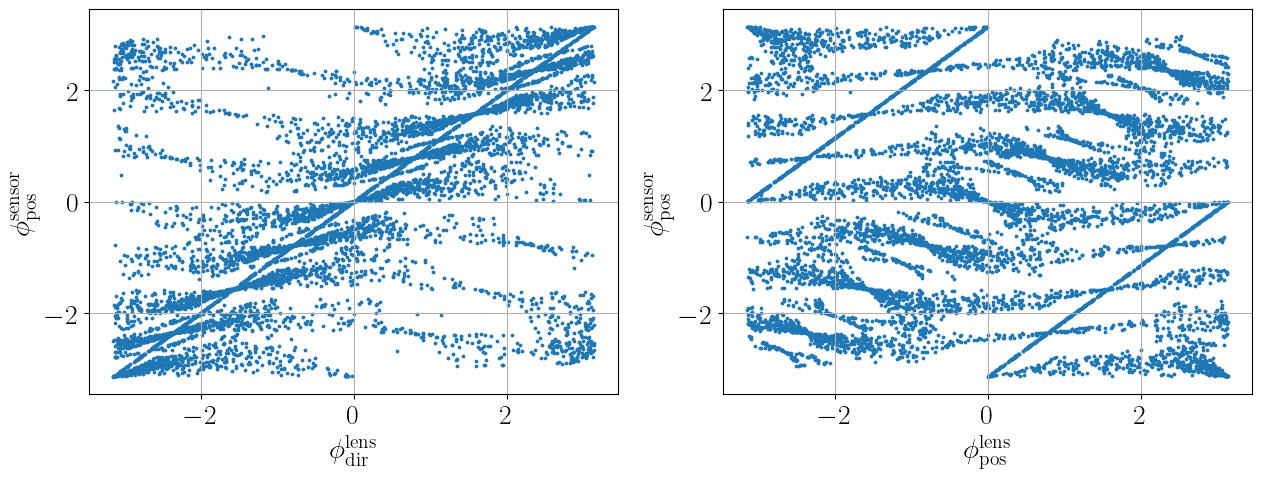

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(df_hits['direction_relative_lens_0_phi'], df_hits['position_relative_phi'], s=3)
ax[0].set_xlabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
ax[0].set_ylabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[0].grid()

ax[1].scatter(df_hits['position_relative_lens_0_phi'], df_hits['position_relative_phi'], s=3)
ax[1].set_xlabel(r'$\phi_{\text{pos}}^{\text{lens}}$')
ax[1].set_ylabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[1].grid()

fig.show()

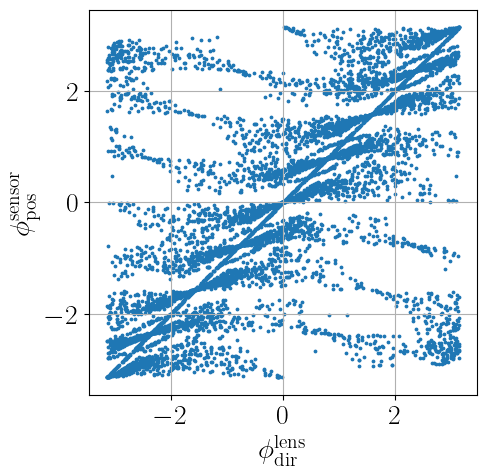

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(df_hits['direction_relative_lens_0_phi'], df_hits['position_relative_phi'], s=3)
ax.set_xlabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
ax.set_ylabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax.grid()
plt.show()

[[-2.27128693 -2.37767    -2.36366707 ...  0.79798173  0.88683053
   1.06610055]
 [-2.27128693 -2.37767    -2.36366707 ...  0.79798173  0.88683053
   1.06610055]]


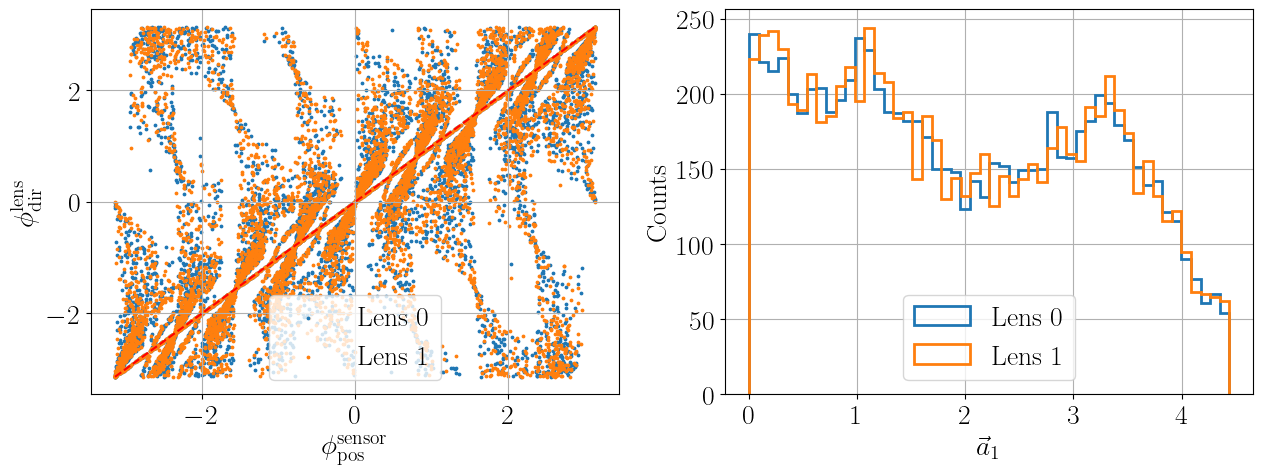

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(df_hits['position_relative_phi'], df_hits['direction_relative_lens_0_phi'], s=3, label='Lens 0')
ax[0].scatter(df_hits['position_relative_phi'], df_hits['direction_relative_lens_1_phi'], s=3, label='Lens 1')
ax[0].plot([-np.pi, np.pi], [-np.pi, np.pi], ls='--', c='r')
ax[0].set_xlabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[0].set_ylabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
ax[0].legend()
ax[0].grid()
# plt.show()

x   = np.array(df_hits['position_relative_phi'].to_list())
y_0 = np.array(df_hits['direction_relative_lens_0_phi'].to_list())
y_1 = np.array(df_hits['direction_relative_lens_1_phi'].to_list())

xy_0 = np.vstack([x, y_0])
xy_1 = np.vstack([x, y_1])

u = np.array([1, 1]) / np.linalg.norm([1, 1])

a1_0 = np.dot(u, xy_0)
a1_1 = np.dot(u, xy_1)

a1_0 = a1_0 * u[:, np.newaxis]
a1_1 = a1_1 * u[:, np.newaxis]

print(a1_0)

a2_0 = xy_0 - a1_0
a2_1 = xy_1 - a1_1

# for a1, a2 in zip(a1_0.T, a2_0.T):
#     print(np.dot(a1, a2))

ax[1].hist(np.linalg.norm(a1_0, axis=0), bins=50, histtype='step', label='Lens 0', lw=lw)
ax[1].hist(np.linalg.norm(a1_1, axis=0), bins=50, histtype='step', label='Lens 1', lw=lw)
ax[1].legend()
ax[1].set_xlabel(r'$\vec{a}_1$')
ax[1].set_ylabel('Counts')
ax[1].grid()
plt.show()

[[-2.27128693 -2.37767    -2.36366707 ...  0.79798173  0.88683053
   1.06610055]
 [-2.27128693 -2.37767    -2.36366707 ...  0.79798173  0.88683053
   1.06610055]]


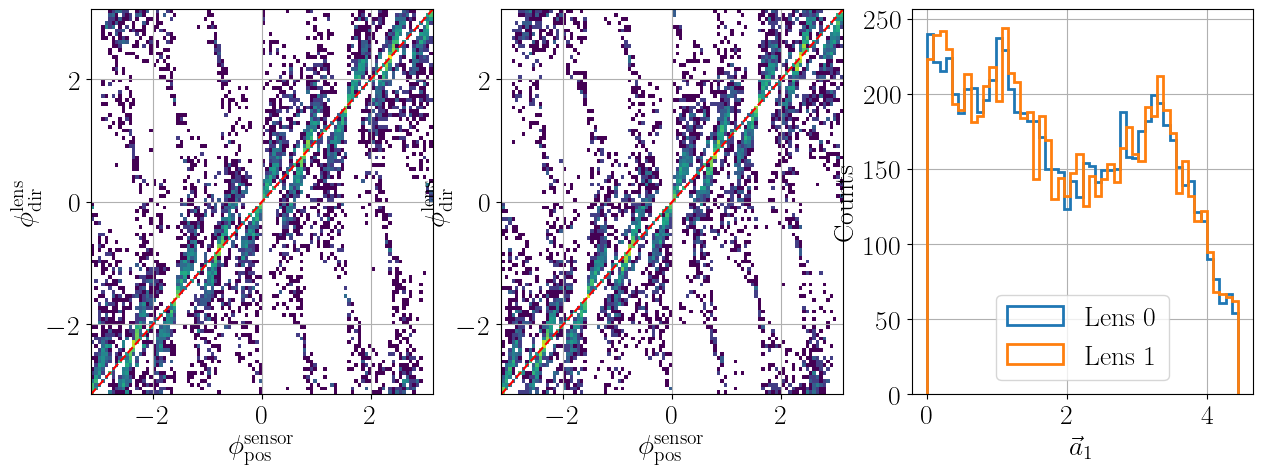

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax.scatter(df_hits['position_relative_phi'], df_hits['direction_relative_lens_0_phi'], s=3, label='Lens 0')
# ax.scatter(df_hits['position_relative_phi'], df_hits['direction_relative_lens_1_phi'], s=3, label='Lens 1')
ax[0].hist2d(df_hits['position_relative_phi'], df_hits['direction_relative_lens_0_phi'], bins=100, norm=LogNorm(), label='Lens 0')
ax[0].plot([-np.pi, np.pi], [-np.pi, np.pi], ls='--', c='r')
ax[0].set_xlabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[0].set_ylabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
# ax[0].legend()
ax[0].grid()
# plt.show()

ax[1].hist2d(df_hits['position_relative_phi'], df_hits['direction_relative_lens_1_phi'], bins=100, norm=LogNorm(), label='Lens 1')
ax[1].plot([-np.pi, np.pi], [-np.pi, np.pi], ls='--', c='r')
ax[1].set_xlabel(r'$\phi_{\text{pos}}^{\text{sensor}}$')
ax[1].set_ylabel(r'$\phi_{\text{dir}}^{\text{lens}}$')
ax[1].grid()

x   = np.array(df_hits['position_relative_phi'].to_list())
y_0 = np.array(df_hits['direction_relative_lens_0_phi'].to_list())
y_1 = np.array(df_hits['direction_relative_lens_1_phi'].to_list())

xy_0 = np.vstack([x, y_0])
xy_1 = np.vstack([x, y_1])

u = np.array([1, 1]) / np.linalg.norm([1, 1])

a1_0 = np.dot(u, xy_0)
a1_1 = np.dot(u, xy_1)

a1_0 = a1_0 * u[:, np.newaxis]
a1_1 = a1_1 * u[:, np.newaxis]

print(a1_0)

a2_0 = xy_0 - a1_0
a2_1 = xy_1 - a1_1

# for a1, a2 in zip(a1_0.T, a2_0.T):
#     print(np.dot(a1, a2))

ax[2].hist(np.linalg.norm(a1_0, axis=0), bins=50, histtype='step', label='Lens 0', lw=lw)
ax[2].hist(np.linalg.norm(a1_1, axis=0), bins=50, histtype='step', label='Lens 1', lw=lw)
ax[2].legend()
ax[2].set_xlabel(r'$\vec{a}_1$')
ax[2].set_ylabel('Counts')
ax[2].grid()
plt.show()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_43754/2523850383.py:90: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


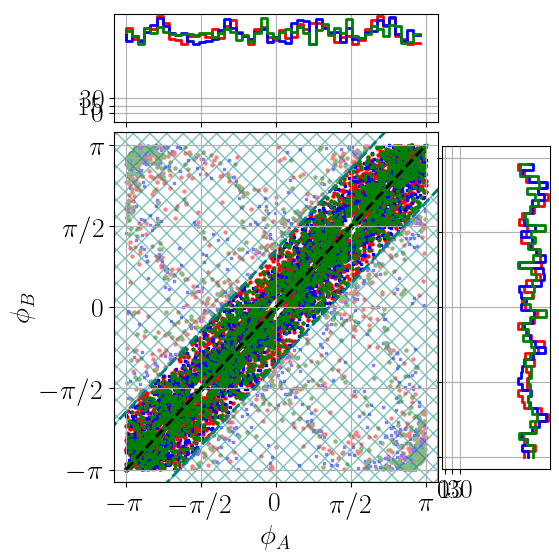

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(6,6), gridspec_kw={'height_ratios': [1, 3], 'width_ratios': [3, 1]})

sigma = np.pi/4
Delta = 0.25
xMax = np.pi + Delta
xMin = -np.pi - Delta
yMax = np.pi + Delta
yMin = -np.pi - Delta

nBins = 50

color = 'teal'
lw = 2

sigma_prime = sigma/np.sqrt(2)

ax[0,1].clear()
ax[0,1].set_axis_off()

ax[0,1].scatter([],[], s=40, marker='o', color='r', label=r'$\phi_A=\phi\in\gamma_i$, \hspace{3mm} $\phi_B=\phi\in\gamma_{01}$')
ax[0,1].scatter([],[], s=40, marker='s', color='b', label=r'$\phi_A=\phi\in\gamma_{01}$, \hspace{0mm} $\phi_B=\phi\in\gamma_t$')
ax[0,1].scatter([],[], s=40, marker='*', color='g', label=r'$\phi_A=\phi\in\gamma_i$, \hspace{3mm} $\phi_B=\phi\in\gamma_t$'   )

ax[1,0].scatter(df_hits['direction_relative_lens_0_phi'], df_hits['direction_relative_lens_1_phi'], s=4.5, marker='o', color='r', alpha=1)
ax[1,0].scatter(df_hits['direction_relative_lens_1_phi'], df_hits['direction_relative_phi'       ], s=4.5, marker='s', color='b', alpha=1)
ax[1,0].scatter(df_hits['direction_relative_lens_0_phi'], df_hits['direction_relative_phi'       ], s=4.5, marker='*', color='g', alpha=1)

ax[1,0].plot([-np.pi, np.pi], [-np.pi, np.pi], 'k--', lw=lw)
ax[1,0].plot([-np.pi-sigma_prime, np.pi-sigma_prime], [-np.pi+sigma_prime, np.pi+sigma_prime], color=color, lw=lw, linestyle='--')
ax[1,0].plot([-np.pi+sigma_prime, np.pi+sigma_prime], [-np.pi-sigma_prime, np.pi-sigma_prime], color=color, lw=lw, linestyle='--')
ax[1,0].fill_between([xMin, xMax], [yMax, yMax], [xMin+2*sigma_prime, xMax+2*sigma_prime], facecolor='white', alpha=0.5, hatch=r'xx', edgecolor=color)
ax[1,0].fill_between([xMin, xMax], [yMin, yMin], [xMin-2*sigma_prime, xMax-2*sigma_prime], facecolor='white', alpha=0.5, hatch=r'xx', edgecolor=color)

hist_1_i, bins_1_i = np.histogram(df_hits['direction_relative_lens_0_phi'], bins=np.linspace(-np.pi, np.pi, nBins))
hist_1_01, bins_1_01 = np.histogram(df_hits['direction_relative_lens_1_phi'], bins=np.linspace(-np.pi, np.pi, nBins))
hist_1_t, bins_1_t = np.histogram(df_hits['direction_relative_phi'], bins=np.linspace(-np.pi, np.pi, nBins))

ax[0,0].plot(bins_1_i[:-1], hist_1_i, color='r', lw=lw, ls='-', drawstyle='steps-pre')
ax[0,0].plot(bins_1_01[:-1], hist_1_01, color='b', lw=lw, ls='-', drawstyle='steps-pre')
ax[0,0].plot(bins_1_t[:-1], hist_1_t, color='g', lw=lw, ls='-', drawstyle='steps-pre')

hist_2_i, bins_2_i = np.histogram(df_hits['direction_relative_lens_0_phi'], bins=np.linspace(-np.pi, np.pi, nBins))
hist_2_01, bins_2_01 = np.histogram(df_hits['direction_relative_lens_1_phi'], bins=np.linspace(-np.pi, np.pi, nBins))
hist_2_t, bins_2_t = np.histogram(df_hits['direction_relative_phi'], bins=np.linspace(-np.pi, np.pi, nBins))

ax[1,1].plot(hist_2_i, bins_2_i[:-1], color='r', lw=lw, ls='-', drawstyle='steps-pre')
ax[1,1].plot(hist_2_01, bins_2_01[:-1], color='b', lw=lw, ls='-', drawstyle='steps-pre')
ax[1,1].plot(hist_2_t, bins_2_t[:-1], color='g', lw=lw, ls='-', drawstyle='steps-pre')

ax[1,0].set_xlabel(r'$\phi_A$')
ax[1,0].set_ylabel(r'$\phi_B$')
ax[1,0].set_xlim(xMin, xMax)
ax[1,0].set_ylim(yMin, yMax)
ax[1,0].set_xticks(np.linspace(-np.pi, np.pi, 5))
ax[1,0].set_yticks(np.linspace(-np.pi, np.pi, 5))
ax[1,0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax[1,0].set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# ax[1,0].set_aspect('equal')

ax[0,0].set_xlabel(r'')
ax[0,0].set_ylabel(r'')
ax[0,0].set_xlim(xMin, xMax)
ax[0,0].set_ylim(ymin=-20)
ax[0,0].set_xticks(np.linspace(-np.pi, np.pi, 5))
ax[0,0].set_yticks(np.linspace(0, 30, 3))
# ax[0,0].set_yticks(np.linspace(-2, 2, 5))
ax[0,0].set_xticklabels(['']*5)
# ax[0,0].set_yticklabels(['']*5)
ax[0,0].grid()
ax[0,0].set_aspect((xMax-xMin)/(ax[0,0].get_ylim()[1]-ax[0,0].get_ylim()[0])/3)

ax[1,1].set_xlabel(r'')
ax[1,1].set_ylabel(r'')
ax[1,1].set_xlim(xmin=-5)
ax[1,1].set_ylim(yMin, yMax)
# ax[1,1].set_xticks(np.linspace(-2, 2, 5))
ax[1,1].set_xticks(np.linspace(0, 30, 3))
ax[1,1].set_yticks(np.linspace(-np.pi, np.pi, 5))
# ax[1,1].set_xticklabels(['']*5)
ax[1,1].set_yticklabels(['']*5)
ax[1,1].grid()
ax[1,1].set_aspect((ax[1,1].get_xlim()[1]-ax[1,1].get_xlim()[0])/(yMax-yMin)*3)

# ax[0,1].legend(loc='lower left', bbox_to_anchor=(0, 0))
ax[1,0].grid()

fig.tight_layout(h_pad=0, w_pad=0)

fig.savefig('../figures/dirPhi_translation.pdf', bbox_inches='tight')
fig.show()

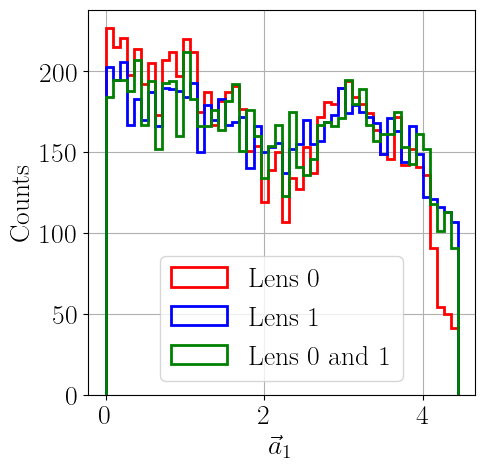

In [16]:
x0 = np.array(df_hits['direction_relative_lens_0_phi'].to_list())
x1 = np.array(df_hits['direction_relative_lens_1_phi'].to_list())

y0 = np.array(df_hits['direction_relative_lens_1_phi'].to_list())
y1 = np.array(df_hits['direction_relative_phi'       ].to_list())

x0y0 = np.vstack([x0, y0])
x1y1 = np.vstack([x1, y1])
x0y1 = np.vstack([x0, y1])

u = np.array([1, 1]) / np.linalg.norm([1, 1])

a1_00 = np.dot(u, x0y0)
a1_11 = np.dot(u, x1y1)
a1_01 = np.dot(u, x0y1)

a1_00 = a1_00 * u[:, np.newaxis]
a1_11 = a1_11 * u[:, np.newaxis]
a1_01 = a1_01 * u[:, np.newaxis]

a2_00 = x0y0 - a1_00
a2_11 = x1y1 - a1_11
a2_01 = x0y1 - a1_01

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(np.linalg.norm(a1_00, axis=0), bins=50, histtype='step', label='Lens 0'      , lw=lw, color='r')
ax.hist(np.linalg.norm(a1_11, axis=0), bins=50, histtype='step', label='Lens 1'      , lw=lw, color='b')
ax.hist(np.linalg.norm(a1_01, axis=0), bins=50, histtype='step', label='Lens 0 and 1', lw=lw, color='g')
ax.legend()
ax.set_xlabel(r'$\vec{a}_1$')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_43754/1531378420.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


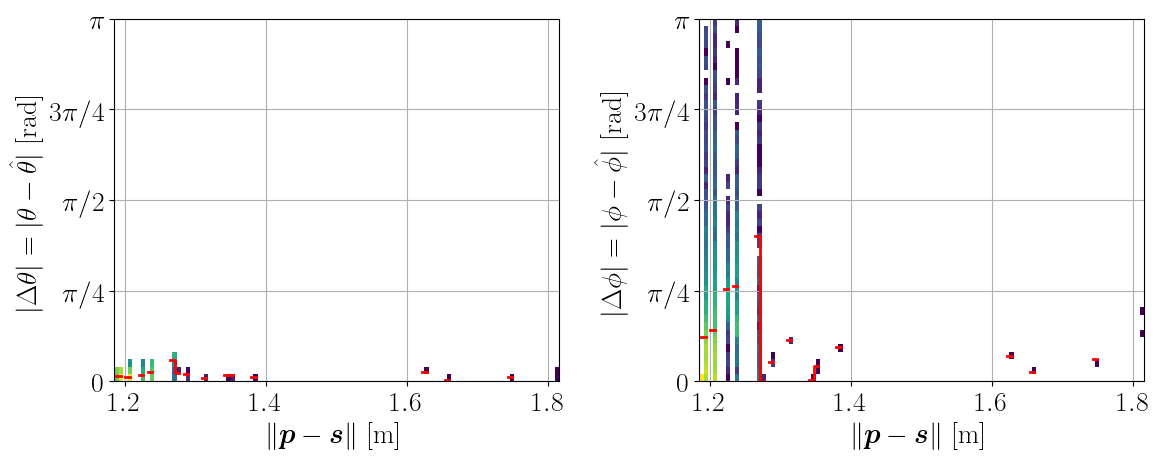

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

scale = 1000
nBins = 100

absv = True
log = True

distBins = np.linspace(
    np.min(df_hits['relativeVector_r']), 
    np.max(df_hits['relativeVector_r']), 
    nBins
)

if absv:
    erroBins = np.linspace(0, np.pi, nBins//2)
    df_hits['theta_error_temp'] = df_hits['theta_error'].apply(lambda x: np.abs(x))
    df_hits['phi_error_temp']   = df_hits['phi_error'  ].apply(lambda x: np.abs(x))
else:
    erroBins = np.linspace(-np.pi, np.pi, nBins)
    df_hits['theta_error_temp'] = df_hits['theta_error']
    df_hits['phi_error_temp']   = df_hits['phi_error'  ]

df_hits['relativeVector_r_bin'] = pd.cut(df_hits['relativeVector_r'], bins=distBins, labels=False)
# mean_theta = (df_hits.groupby('relativeVector_r_bin')['theta_error_temp'].mean()/scale).to_numpy()
# mean_phi   = (df_hits.groupby('relativeVector_r_bin')['phi_error_temp'  ].mean()/scale).to_numpy()

mean_theta = np.zeros(len(distBins)-1)
mean_phi   = np.zeros(len(distBins)-1)

for i in range(len(distBins)-1):
    mean_theta[i] = df_hits[(df_hits['relativeVector_r'] > distBins[i]) & (df_hits['relativeVector_r'] < distBins[i+1])]['theta_error_temp'].mean()
    mean_phi[i]   = df_hits[(df_hits['relativeVector_r'] > distBins[i]) & (df_hits['relativeVector_r'] < distBins[i+1])]['phi_error_temp'  ].mean()

ax[0].hist2d(df_hits['relativeVector_r']/scale, df_hits['theta_error_temp'], bins=(distBins/scale, erroBins), norm=(LogNorm() if log else None))
ax[0].plot(distBins[:-1]/scale, mean_theta, c='r', lw=2, drawstyle='steps-mid')
ax[0].set_xlabel(r'$\norm{\boldsymbol{p}-\boldsymbol{s}}$ [m]')
ax[0].set_ylabel(r'$\abs{\Delta\theta}=\abs{\theta-\hat{\theta}}$ [rad]')
ax[0].set_ylim(0, np.pi)
ax[0].set_yticks(np.linspace(0, np.pi, 5))
ax[0].set_yticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
ax[0].grid()

ax[1].hist2d(df_hits['relativeVector_r']/scale, df_hits['phi_error_temp'], bins=(distBins/scale, erroBins), norm=(LogNorm() if log else None))
ax[1].plot(distBins[:-1]/scale, mean_phi, c='r', lw=2, drawstyle='steps-mid')
ax[1].set_xlabel(r'$\norm{\boldsymbol{p}-\boldsymbol{s}}$ [m]')
ax[1].set_ylabel(r'$\abs{\Delta\phi}=\abs{\phi-\hat{\phi}}$ [rad]')
ax[1].set_ylim(0, np.pi)
ax[1].set_yticks(np.linspace(0, np.pi, 5))
ax[1].set_yticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
ax[1].grid()

# fig.tight_layout(h_pad=0)
fig.tight_layout()
fig.show()

df_hits = df_hits.drop(columns=['theta_error_temp', 'phi_error_temp', 'relativeVector_r_bin'])

# Variance by Sensor

In [18]:
allHits = np.array(df_hits['relativePosition_binned'].to_list()).reshape(-1, 2)
allBins = np.array(df_hits['relativePosition_nBin'  ].to_list()).reshape(-1, 2)
xLimits = (int(np.min(allHits[:,0])), int(np.max(allHits[:,0])))
yLimits = (int(np.min(allHits[:,1])), int(np.max(allHits[:,1])))
xNbins  = (int(np.min(allBins[:,0])), int(np.max(allBins[:,0])))
yNbins  = (int(np.min(allBins[:,1])), int(np.max(allBins[:,1])))

error_theta_mean    = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_phi_mean      = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_theta_sigma_1 = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_phi_sigma_1   = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_theta_sigma_2 = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_phi_sigma_2   = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_theta_sigma_3 = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))
error_phi_sigma_3   = np.zeros((xNbins[1]-xNbins[0], yNbins[1]-yNbins[0]))

for ix in range(xNbins[0], xNbins[1]):
    for iy in range(yNbins[0], yNbins[1]):
        i_cur = np.array([ix, iy])
        i = np.where(np.all(allBins == i_cur, axis=1))[0]
        if len(i) == 0:
            continue
        thetas = df_hits['theta_error' ][i]
        phis   = df_hits['phi_error'   ][i]

        thetas = np.abs(thetas)
        phis   = np.abs(phis  )

        error_theta_mean[ix, iy] = np.mean(thetas)
        error_phi_mean  [ix, iy] = np.mean(phis)
        error_theta_sigma_1[ix, iy] = np.percentile(thetas, 68)
        error_phi_sigma_1  [ix, iy] = np.percentile(phis, 68)
        error_theta_sigma_2[ix, iy] = np.percentile(thetas, 95)
        error_phi_sigma_2  [ix, iy] = np.percentile(phis, 95)
        error_theta_sigma_3[ix, iy] = np.percentile(thetas, 99)
        error_phi_sigma_3  [ix, iy] = np.percentile(phis, 99)


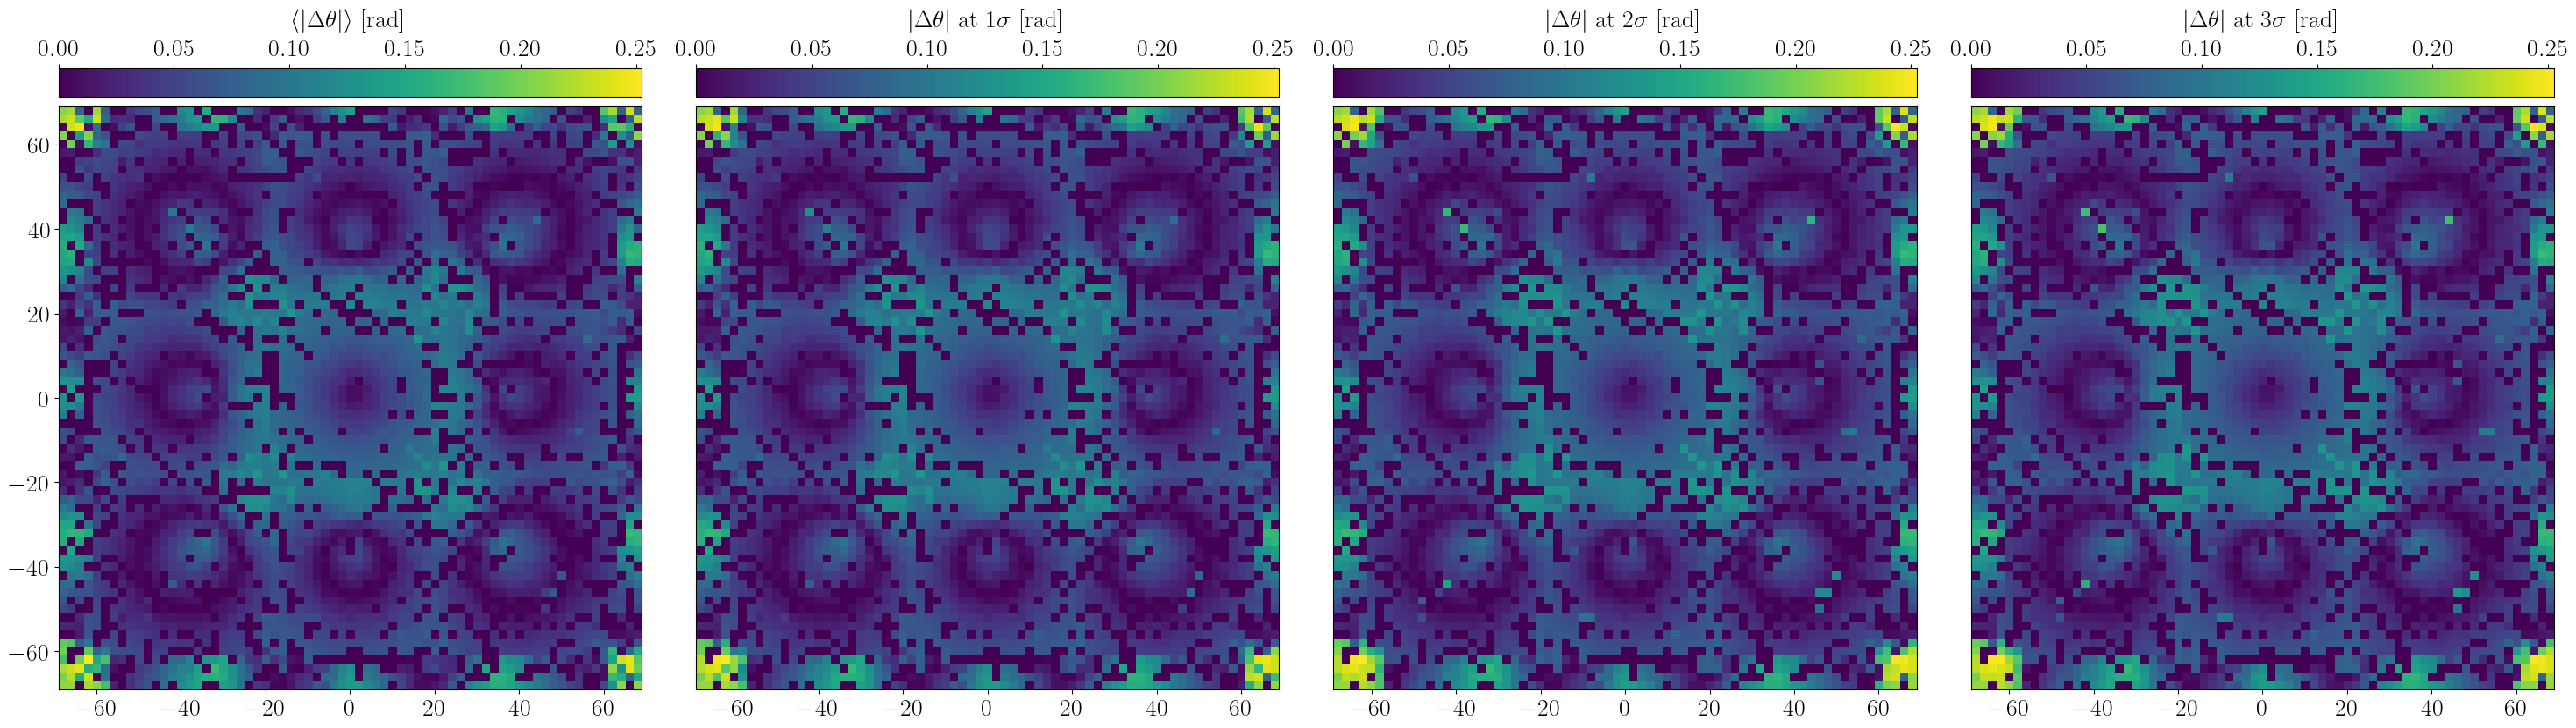

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(30, 8))

im0 = ax[0].imshow(error_theta_mean   , origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis')
im1 = ax[1].imshow(error_theta_sigma_1, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis')
im2 = ax[2].imshow(error_theta_sigma_2, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis')
im3 = ax[3].imshow(error_theta_sigma_3, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis')

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')
ax[3].set_aspect('equal')

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])

divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])
divider2 = make_axes_locatable(ax[2])
divider3 = make_axes_locatable(ax[3])

cax0 = divider0.append_axes("top", size="5%", pad=0.1)
cax1 = divider1.append_axes("top", size="5%", pad=0.1)
cax2 = divider2.append_axes("top", size="5%", pad=0.1)
cax3 = divider3.append_axes("top", size="5%", pad=0.1)

cbar0 = fig.colorbar(im0, cax=cax0, orientation='horizontal')
cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')
cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')
cbar3 = fig.colorbar(im3, cax=cax3, orientation='horizontal')

cbar0.ax.xaxis.set_ticks_position('top')
cbar1.ax.xaxis.set_ticks_position('top')
cbar2.ax.xaxis.set_ticks_position('top')
cbar3.ax.xaxis.set_ticks_position('top')

cbar0.set_label(r'$\langle\abs{\Delta\theta}\rangle$ [rad]', labelpad=10)
cbar1.set_label(r'$\abs{\Delta\theta}$ at $1\sigma$ [rad]' , labelpad=10)
cbar2.set_label(r'$\abs{\Delta\theta}$ at $2\sigma$ [rad]' , labelpad=10)
cbar3.set_label(r'$\abs{\Delta\theta}$ at $3\sigma$ [rad]' , labelpad=10)

cbar0.ax.xaxis.set_label_position('top')
cbar1.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_label_position('top')
cbar3.ax.xaxis.set_label_position('top')

# ax[0].set_yscale('log')
# ax[1].set_yscale('log')
# ax[2].set_yscale('log')
# ax[3].set_yscale('log')

fig.tight_layout(h_pad=0.8, w_pad=0.1)

plt.show()

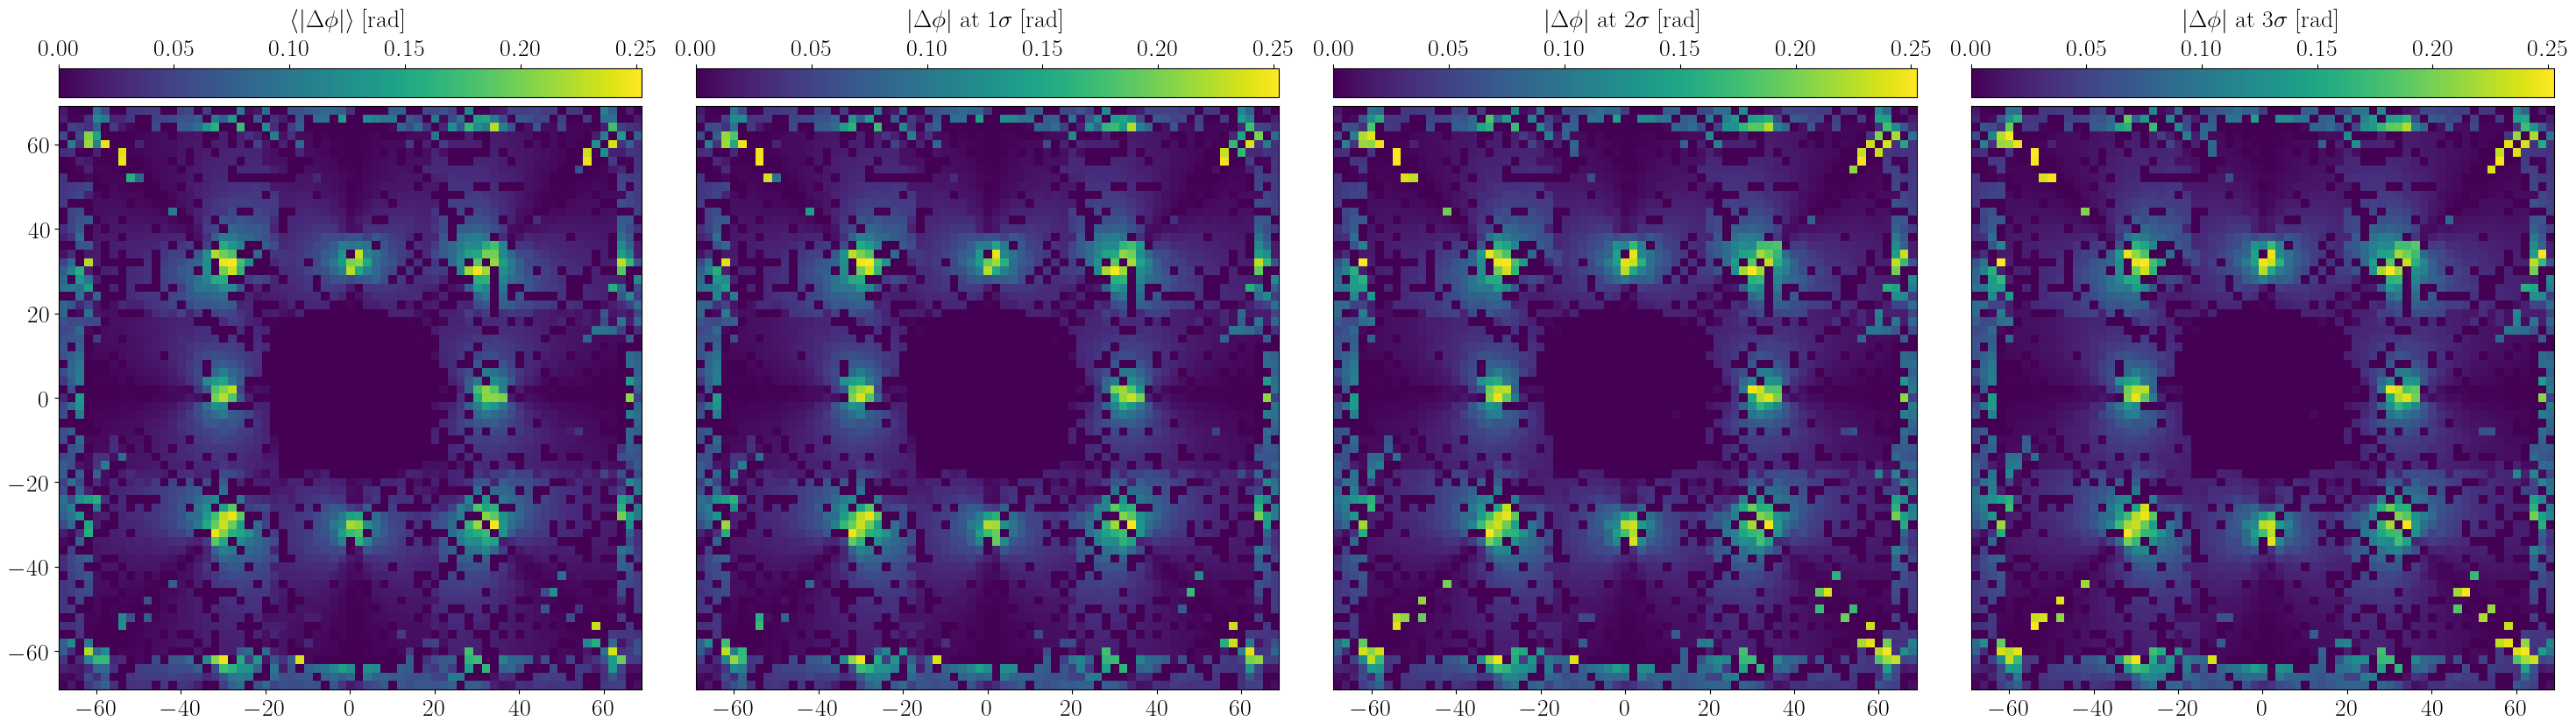

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(30, 8))

ax[0].imshow(error_phi_mean   , origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis')
ax[1].imshow(error_phi_sigma_1, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis')
ax[2].imshow(error_phi_sigma_2, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis')
ax[3].imshow(error_phi_sigma_3, origin='lower', extent=(xLimits[0], xLimits[1], yLimits[0], yLimits[1]), cmap='viridis')

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')
ax[3].set_aspect('equal')

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])

divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])
divider2 = make_axes_locatable(ax[2])
divider3 = make_axes_locatable(ax[3])

cax0 = divider0.append_axes("top", size="5%", pad=0.1)
cax1 = divider1.append_axes("top", size="5%", pad=0.1)
cax2 = divider2.append_axes("top", size="5%", pad=0.1)
cax3 = divider3.append_axes("top", size="5%", pad=0.1)

cbar0 = fig.colorbar(im0, cax=cax0, orientation='horizontal')
cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')
cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')
cbar3 = fig.colorbar(im3, cax=cax3, orientation='horizontal')

cbar0.ax.xaxis.set_ticks_position('top')
cbar1.ax.xaxis.set_ticks_position('top')
cbar2.ax.xaxis.set_ticks_position('top')
cbar3.ax.xaxis.set_ticks_position('top')

cbar0.set_label(r'$\langle\abs{\Delta\phi}\rangle$ [rad]', labelpad=10)
cbar1.set_label(r'$\abs{\Delta\phi}$ at $1\sigma$ [rad]' , labelpad=10)
cbar2.set_label(r'$\abs{\Delta\phi}$ at $2\sigma$ [rad]' , labelpad=10)
cbar3.set_label(r'$\abs{\Delta\phi}$ at $3\sigma$ [rad]' , labelpad=10)

cbar0.ax.xaxis.set_label_position('top')
cbar1.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_label_position('top')
cbar3.ax.xaxis.set_label_position('top')

fig.tight_layout(h_pad=0.8, w_pad=0.1)

plt.show()